### Tutorial for processing tabulated tide gauge data.

Tidal highs and lows can be scraped from a website such as:<br>
https://www.ntslf.org/tides/tidepred?port=Liverpool<br>
![NTSLF tidal predictions](https://www.ntslf.org/files/ntslf_php/plottide.php?port=Liverpool)

and format them into a csv file:<br>

LIVERPOOL (GLADSTONE DOCK)    TZ: UT(GMT)/BST     Units: METRES    Datum: Chart Datum<br>
01/10/2020  06:29    1.65<br>
01/10/2020  11:54    9.01<br>
01/10/2020  18:36    1.87<br>

The data can be used in the following demonstration.

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import coast
import numpy as np

Load and plot High and Low Water data.

In [5]:
print("load and plot HLW data")
filnam = "../../example_files/Gladstone_2020-10_HLW.txt"

load and plot HLW data


Set the start and end dates.

In [6]:
date_start = np.datetime64("2020-10-12 23:59")
date_end = np.datetime64("2020-10-14 00:01")

Initiate a TideGauge object, if a filename is passed it assumes it is a GESLA type object.

In [7]:
tg = coast.Tidegauge()

Tidegauge object at 0x55d534deb8c0 initialised


Specify the data read as a High Low Water dataset.

In [8]:
tg.read_hlw(filnam, date_start, date_end)

Show dataset. If timezone is specified then it is presented as requested, otherwise uses UTC.

In [9]:
print("Try the TideGauge.show() method:")
tg.show(timezone="Europe/London")

Try the TideGauge.show() method:


Do a basic plot of these points.

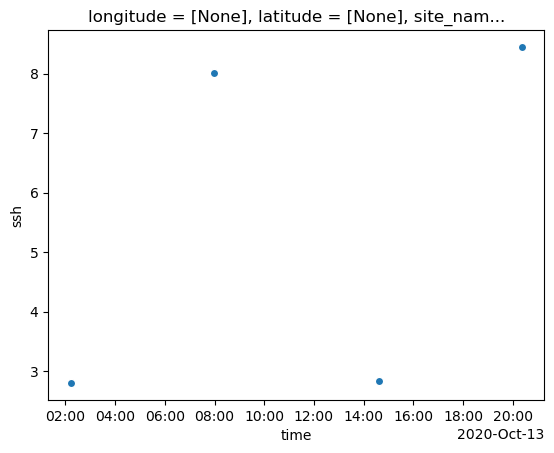

In [10]:
tg.dataset.plot.scatter(x="time", y="ssh")

There is a method to locate HLW events around an approximate date and time.
First state the time of interest.

In [11]:
time_guess = np.datetime64("2020-10-13 12:48")

Then recover all the HLW events in a +/- window, of specified size (iteger hrs).
The default winsize = 2 (hrs).

In [12]:
HLW = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), method="window", winsize=24)

Alternatively recover the closest HLW event to the input timestamp.

In [13]:
HLW = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), method="nearest_1")

Or the nearest two events to the input timestamp.

In [14]:
HLW = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), method="nearest_2")

Extract the Low Tide value.

In [15]:
print("Try the TideGauge.get_tidetabletimes() methods:")
print("LT:", HLW[np.argmin(HLW.data)].values, "m at", HLW[np.argmin(HLW.data)].time.values)

Try the TideGauge.get_tidetabletimes() methods:
LT: 2.83 m at 2020-10-13T14:36:00.000000000


Extract the High Tide value.

In [16]:
print("HT:", HLW[np.argmax(HLW.data)].values, "m at", HLW[np.argmax(HLW.data)].time.values)

HT: 8.01 m at 2020-10-13T07:59:00.000000000


Or use the the nearest High Tide method to get High Tide.

In [17]:
HT = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), method="nearest_HW")
print("HT:", HT.values, "m at", HT.time.values)

HT: 8.01 m at 2020-10-13T07:59:00.000000000


The get_tidetabletimes() method can take extra paremeters such as a window size, an integer number of hours to seek either side of the guess.

In [18]:
HLW = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), winsize=2, method="nearest_1")


HLW = tg.get_tide_table_times(np.datetime64("2020-10-13 12:48"), winsize=1, method="nearest_1")

In [19]:
HLW

<xarray.DataArray 'ssh' (t_dim: 1)> Size: 8B
array([2.83])
Coordinates:
    time       (t_dim) datetime64[ns] 8B 2020-10-13T14:36:00
    longitude  object 8B None
    latitude   object 8B None
    site_name  <U24 96B 'LIVERPOOL(GLADSTONEDOCK)'
Dimensions without coordinates: t_dim